**[Home](https://janxkoci.github.io) | [Tutorials](https://janxkoci.github.io/tutorials)**

# Jupyter and R for data science
This post describes the advantages of Jupyter Notebook and conda manager for scientists working with R.

> #### Motivation 
> I used to link to a blog post on anaconda.org to get my readers on the same page with Jupyter setup, but it was taken down. So I decided to write my own tutorial, which I can link to in my future posts. Everyone else is also free to share it.

[Jupyter](http://jupyter.org) (formerly IPython) is commonly used by scientists to share results of their work in a manner that promotes reproducibility and open science. Jupyter notebook is a prototyping interface that allows to mix executable code with narrative text, equations, interactive figures, and tables, or convert the text into presentation with a few clicks. It supports over 50 programming languages, including popular data science languages like python, julia, ruby or R (notice ju-pyt-er), using special kernels.

[Conda](http://conda.io/) is an open source and cross-platform package manager, specialized in distributing science software written in various languages. The package manager can be obtained on it's own as [miniconda](https://conda.io/miniconda.html) or as part of [Anaconda distribution](https://www.anaconda.com/download/), along with over two hundreds of Python packages for science, math, engineering, and data analysis. It can then be used to install many scientific and bioinformatic packages, including jupyter and IRkernel, the R kernel for jupyter notebooks.

We can now use conda to install jupyter, R kernel, and few useful packages for phylogenetic data manipulation. Let's get to work!

## Setting up Jupyter with conda
I usually recommend installing [miniconda](https://conda.io/miniconda.html), unless your workflow is "Python-heavy", in which case you can install [Anaconda](https://www.anaconda.com/download/) instead. The difference is only with default packages: 
- **Miniconda** includes only conda manager with Python and a few dependencies. It then allows to install additional packages, including any or all from Anaconda distribution.
- **Anaconda** includes the above plus over two hundred additional python packages for scientific computing, such as `numpy` & `scipy`, Jupyter, Spyder IDE etc. If you mostly work with R, you don't need most of them.

> #### Quick word on R & conda
> Anaconda recently started collaborating with Microsoft and they decided to ship [Microsoft's fork of R](https://www.anaconda.com/blog/company-blog/introducing-microsoft-r-open-as-default-r-for-anaconda-distribution/) (called MRO) with the default installations. This fork is mostly identical to official R, except it is made to work with Microsoft's proprietary plugin for parallel and remote computing. If you don't want to use this proprietary plugin, you may wish to install the official unmodified version of R by including the `r-base` package in your installation commands. If you don't include it, the default MS fork `mro-base` will be installed instead.

So to install e.g. the *R Essentials* bundle, which includes many popular R packages, such as `dplyr`, `ggplot`, `shiny`, `jupyter`, and more, *but* with official `r-base`, you can run this command:

```bash
conda install r-base r-essentials
```

You may instead prefer to install just R with jupyter and package for phylogeny data manipulation:

```bash
conda install r-base r-irkernel jupyter r-ape
```

## Running R in Jupyter
To start Jupyter notebook session, just create folder for your new project and open terminal in it, then type:

```bash
jupyter-notebook
```

A browser window will open:

![Jupyter notebook start page](https://janxkoci.github.io/img/jupyter_0.png)

From there, you can create your first R notebook by clicking at the "New" button and selecting R from dropdown menu. Then your new notebook will open in a new tab:

![Jupyter notebook start page](https://janxkoci.github.io/img/jupyter_1.png)

Now you can type and execute R code directly in the cells. For example, load the data manipulation package `dplyr`:

In [1]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Explore one of the datasets:

In [2]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


Calculate the average sepal width by species:

In [3]:
iris %>%
 group_by(Species) %>%
 summarise(Sepal.Width.Avg = mean(Sepal.Width)) %>%
 arrange(Sepal.Width.Avg)

Species,Sepal.Width.Avg
versicolor,2.770
virginica,2.974
setosa,3.428


Import the R visualization library `ggplot`:

In [4]:
library(ggplot2)

Plot the Sepal.Width vs. Sepal.Length:

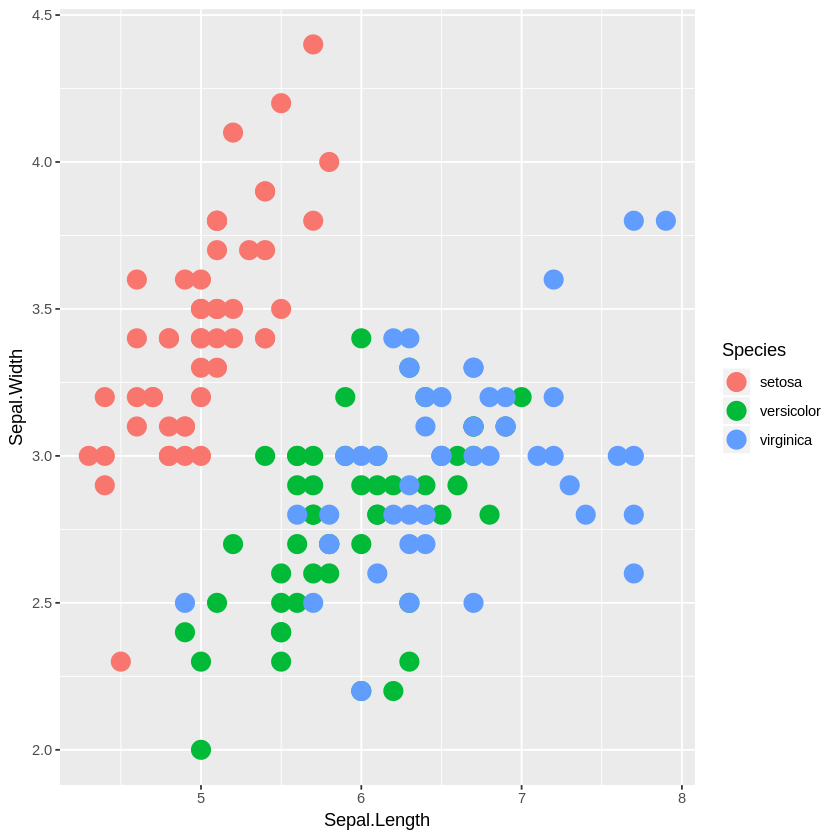

In [5]:
ggplot(data=iris, aes(x=Sepal.Length, y=Sepal.Width, color=Species)) + geom_point(size=5)

## Comments
If you'd like to leave a comment, you can **join the discussion on [Github][gist]**.

[gist]: https://gist.github.com/janxkoci/5ecd85dda9c8e4aa90c823ebddbe55bc